<h1>Exploratory Data Analysis - Customer Loans in Finance Project<h1>

<h2>Imports:<h2>

In [1]:
import db_connect
import db_transform
import db_info
import db_frame_transform
import db_plotter
import db_analysis

<h2>Setup:<h2>

Connecting to the database:

In [2]:
db_conn = db_connect.RDSDatabaseConnector()
db_conn.RDSConnection()
db_conn.RDSExtract()

Save data to a local file:

In [3]:
db_conn.RDSSaveToCSV()

<h2>Converting Data:<h2>

We convert any datatypes that are in the wrong format or are better suited to a differnt datatype to the required status:

In [4]:
db_conv = db_transform.DataTransform(db_conn.loan_payments)
db_conv.convert_to_datetime(['issue_date','last_payment_date','next_payment_date','earliest_credit_line'])
db_conv.convert_to_int()
db_conv.convert_int_to_flt()

<h2>Dataframe Info:<h2>

In [5]:
db_inf = db_info.DataFrameInfo(db_conv.df)

We can check the measures of central tendency (mean, median and standard deviation):

In [6]:
db_inf.get_mean()

id                             7.621797e+06
member_id                      8.655350e+06
loan_amount                    1.333308e+04
funded_amount                  1.322951e+04
funded_amount_inv              1.295262e+04
term                           4.260620e+01
int_rate                       1.350733e+01
instalment                     4.000140e+02
annual_inc                     7.222085e+04
dti                            1.586709e+01
delinq_2yrs                    2.417990e-01
inq_last_6mths                 8.938430e-01
mths_since_last_delinq         3.401920e+01
mths_since_last_record         7.482915e+01
open_accounts                  1.055981e+01
total_accounts                 2.416821e+01
out_prncp                      2.753964e+03
out_prncp_inv                  2.752568e+03
total_payment                  1.207921e+04
total_payment_inv              1.178895e+04
total_rec_prncp                9.407049e+03
total_rec_int                  2.577757e+03
total_rec_late_fee             9

In [7]:
db_inf.get_median()

id                             7084590.00
member_id                      8709873.00
loan_amount                      12000.00
funded_amount                    12000.00
funded_amount_inv                11300.00
term                                36.00
int_rate                            13.16
instalment                         347.15
annual_inc                       61000.00
dti                                 15.60
delinq_2yrs                          0.00
inq_last_6mths                       1.00
mths_since_last_delinq              31.00
mths_since_last_record              87.00
open_accounts                       10.00
total_accounts                      23.00
out_prncp                            0.00
out_prncp_inv                        0.00
total_payment                    10113.25
total_payment_inv                 9835.83
total_rec_prncp                   7644.92
total_rec_int                     1734.64
total_rec_late_fee                   0.00
recoveries                        

In [8]:
db_inf.get_standard_deviation()

id                             9.571362e+06
member_id                      1.031281e+07
loan_amount                    8.082197e+03
funded_amount                  8.019018e+03
funded_amount_inv              8.099474e+03
term                           1.071957e+01
int_rate                       4.392893e+00
instalment                     2.389200e+02
annual_inc                     5.158934e+04
dti                            7.623124e+00
delinq_2yrs                    7.067062e-01
inq_last_6mths                 1.261421e+00
mths_since_last_delinq         2.192324e+01
mths_since_last_record         3.613726e+01
open_accounts                  4.797169e+00
total_accounts                 1.158703e+01
out_prncp                      5.154894e+03
out_prncp_inv                  5.153044e+03
total_payment                  8.391044e+03
total_payment_inv              8.363509e+03
total_rec_prncp                6.958124e+03
total_rec_int                  2.581657e+03
total_rec_late_fee             6

We can check what data types each coulmn are:

In [9]:
db_inf.check_datatypes()

id                                    float64
member_id                             float64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                  float64
int_rate                              float64
instalment                            float64
grade                                  object
sub_grade                              object
employment_length                      object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                           object
purpose                                object
dti                                   float64
delinq_2yrs                           float64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

We can check infomation about the values of the dataframe (shape, the number of null values and the number of distinct values):

In [10]:
db_inf.get_shape()

(54231, 43)

In [11]:
db_inf.get_distinct_values()

id                             54231
member_id                      54231
loan_amount                     1083
funded_amount                   1122
funded_amount_inv               5261
term                               2
int_rate                         457
instalment                     19940
grade                              7
sub_grade                         35
employment_length                 11
home_ownership                     5
annual_inc                      6132
verification_status                3
issue_date                        61
loan_status                        9
payment_plan                       2
purpose                           14
dti                             3611
delinq_2yrs                       16
earliest_credit_line             587
inq_last_6mths                    24
mths_since_last_delinq           100
mths_since_last_record           120
open_accounts                     48
total_accounts                    88
out_prncp                      17673
o

The null values are represented as a percent:

In [12]:
db_inf.get_null_values()

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

<h2>Transforming the Data:<h2>

Here we have the transformation of the data including skewness and correlation as well as the plots:

In [13]:
db_trans = db_frame_transform.DataFrameTransform(db_conv.df)

In [14]:
db_plot = db_plotter.Plotter(db_trans.df)

Plot of the frame before any transformation:

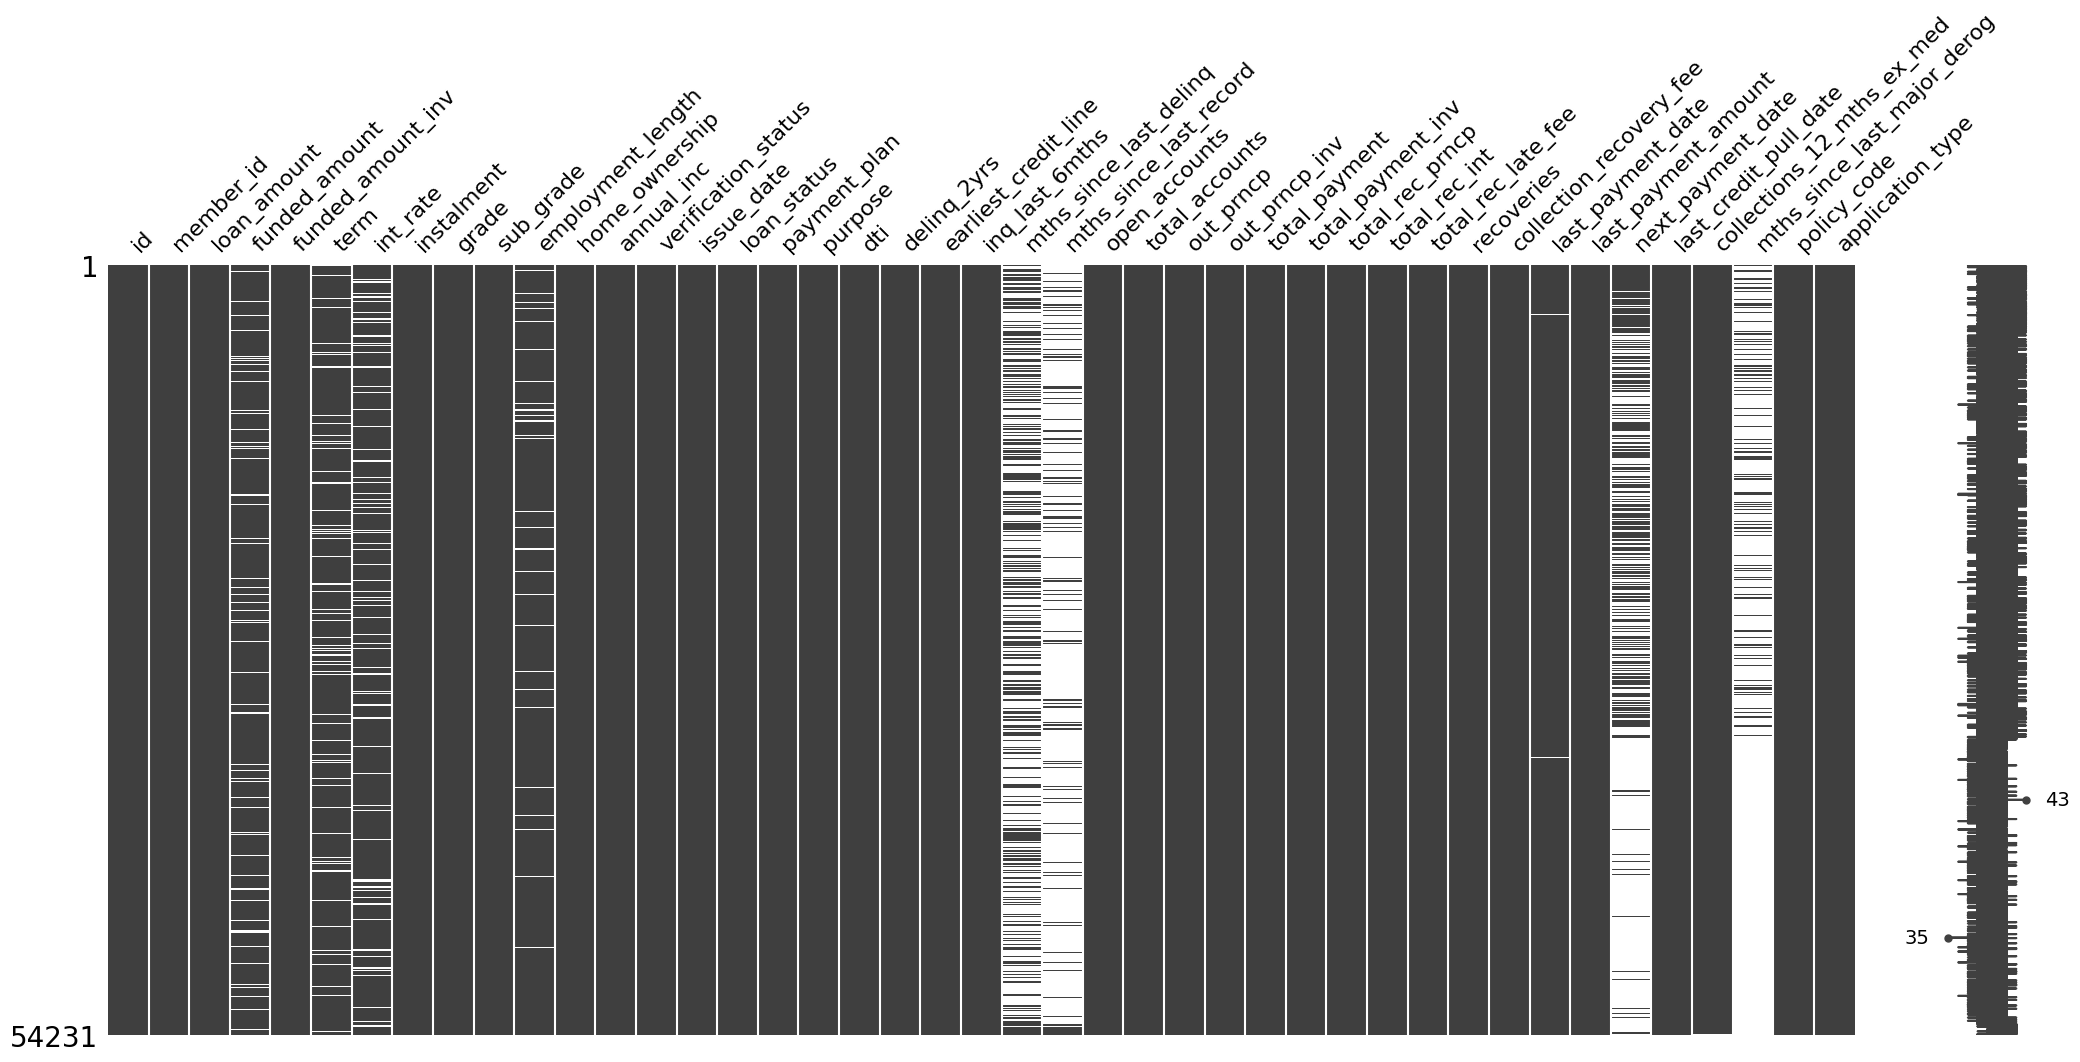

In [15]:
db_plot.plot_frame()

<h3>Null Values:<h3>

We remove columns with null values over a threshold, here we use *50%*:

In [16]:
db_trans.null_values()

Here is the plot of the data after we have removed the large sums of null values:

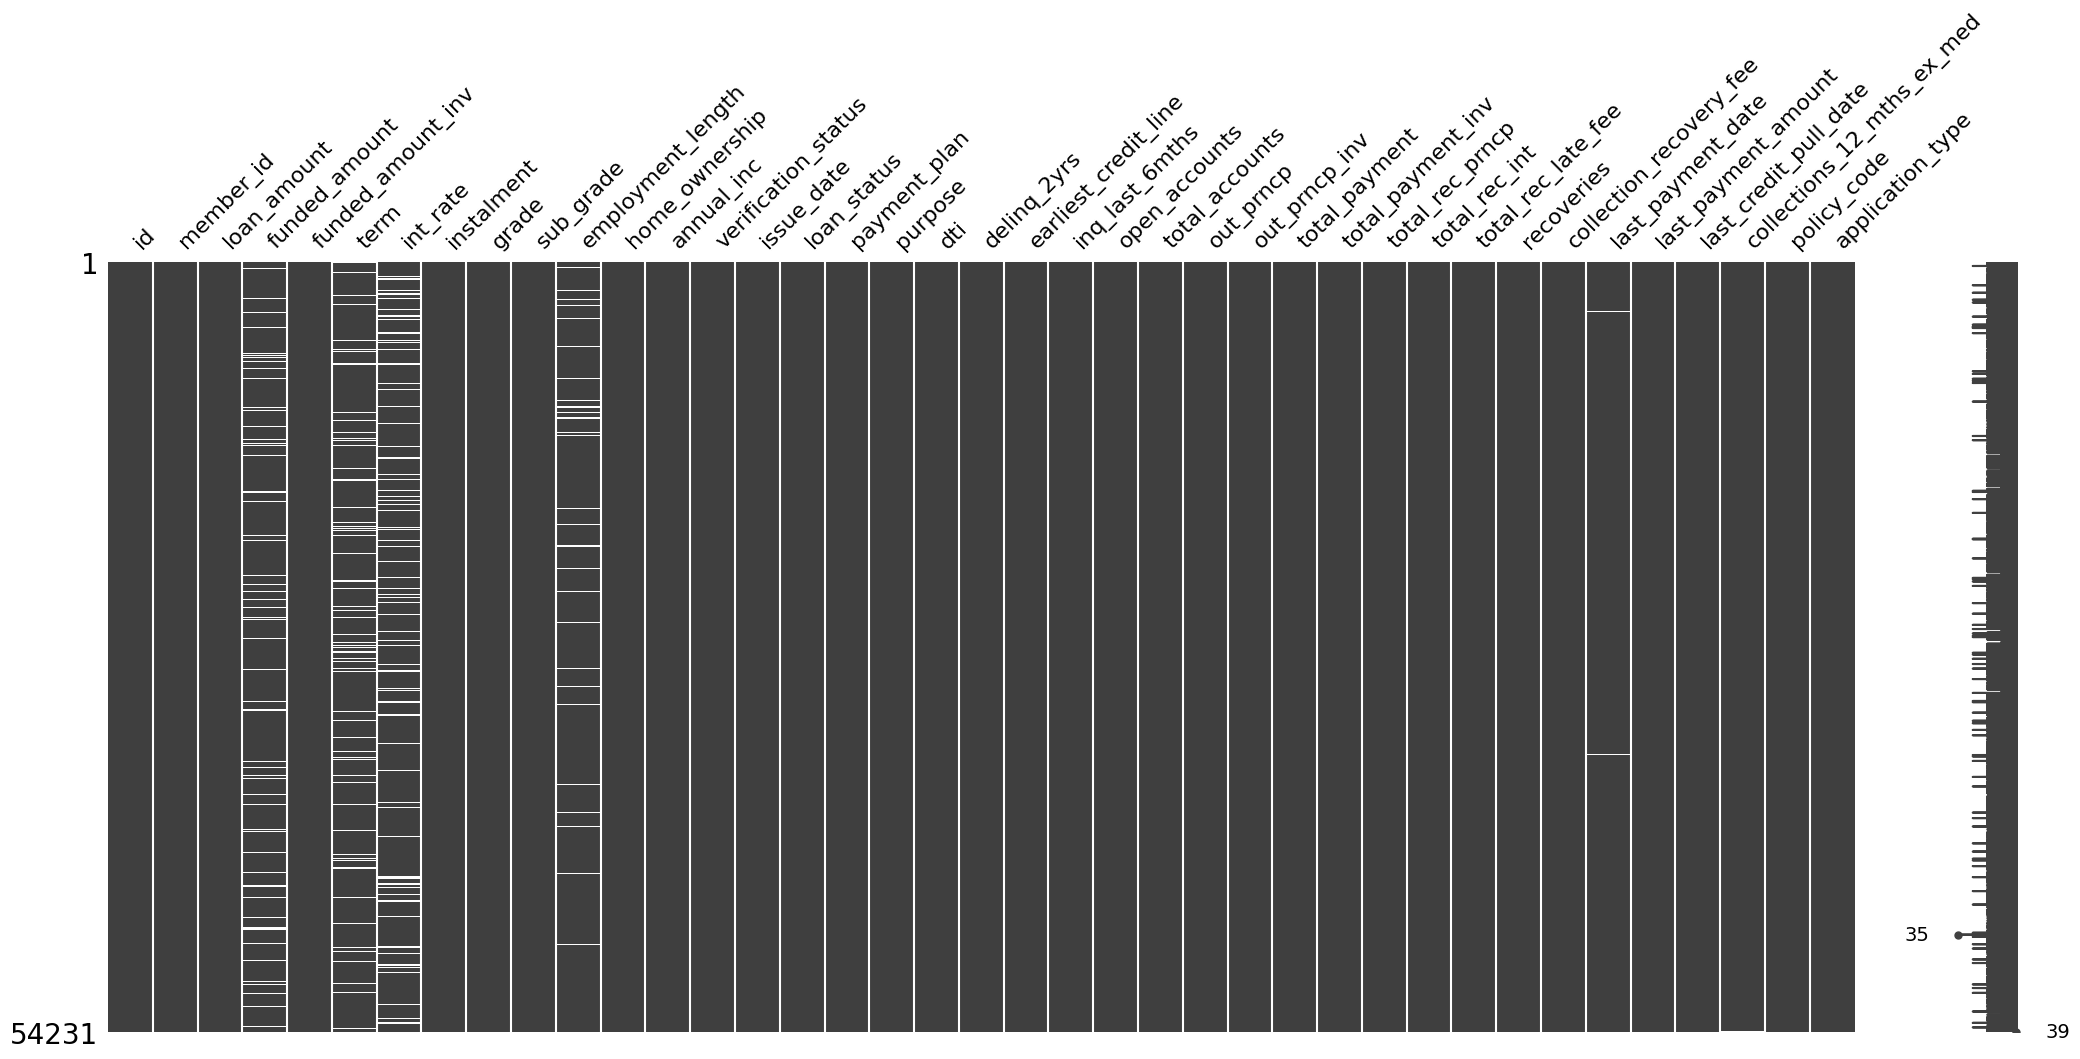

In [17]:
db_plot.reset_frame(db_trans.df)
db_plot.plot_frame()

We then have to remove the rest of the null values, so we impute them with a measure of central tendancy.\
Here we use the *mean* and the *mode* as they fit the best in the given columns:

In [18]:
db_trans.data_impute(['funded_amount', 'int_rate','collections_12_mths_ex_med'], 'mean')
db_trans.data_impute(['employment_length','term', 'last_payment_date', 'last_credit_pull_date'], 'mode')

Here we have the plot of the data with no null values:

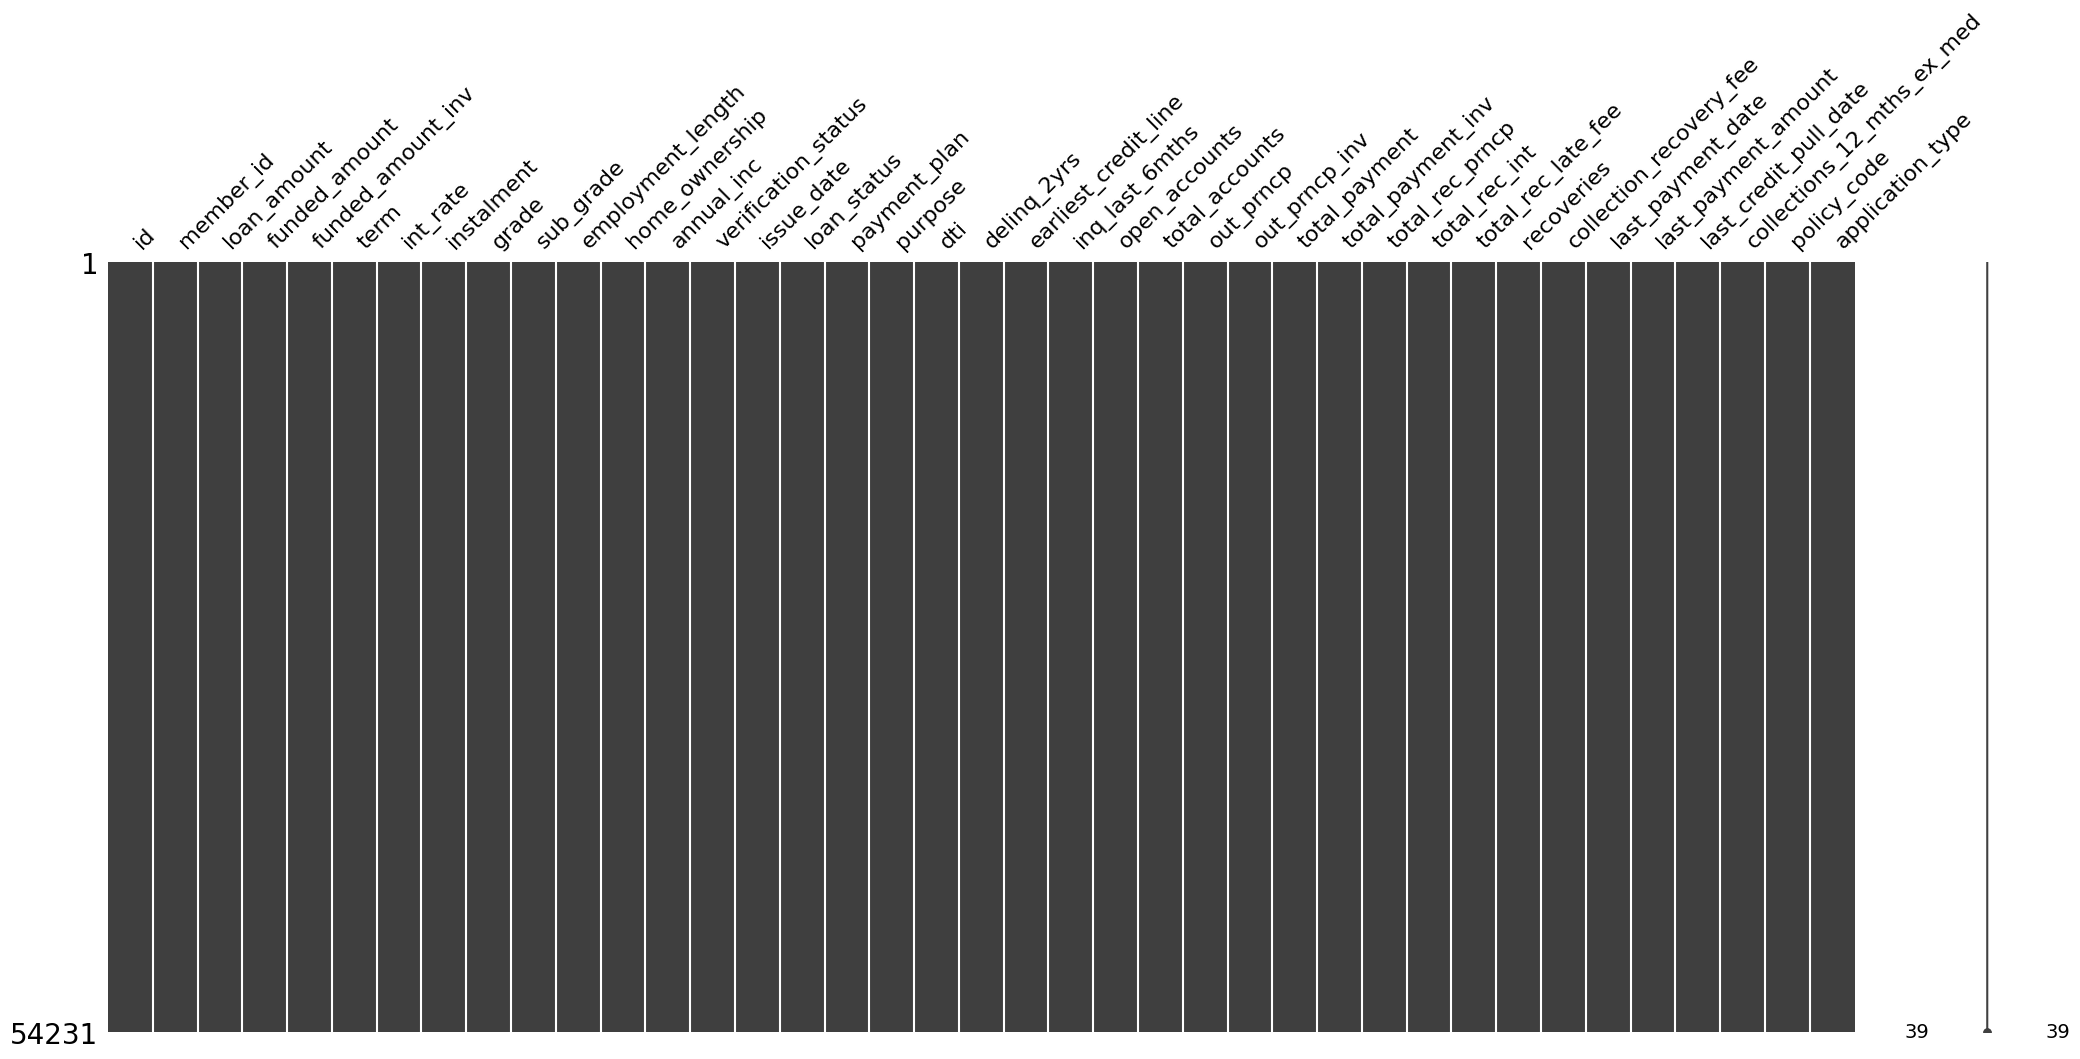

In [19]:
db_plot.reset_frame(db_trans.df)
db_plot.plot_frame()

<h3>Skewness:<h3>

Here is a plot of all the data before using the correction method:

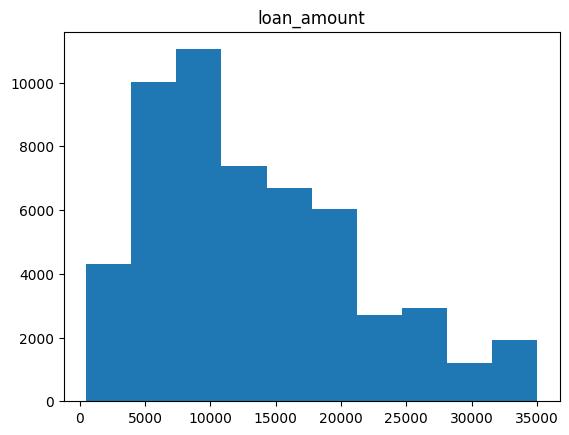

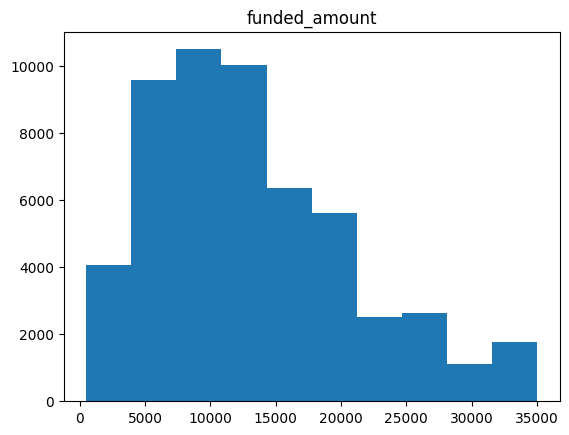

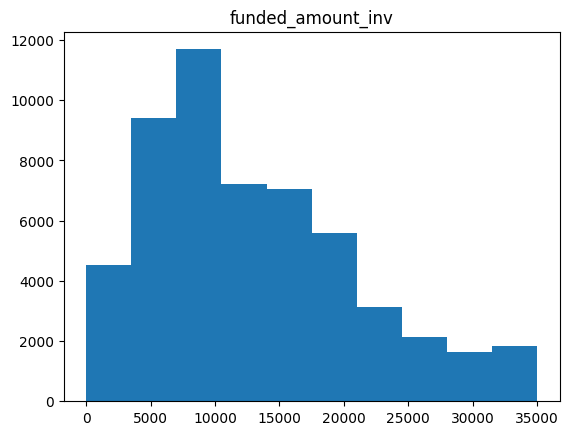

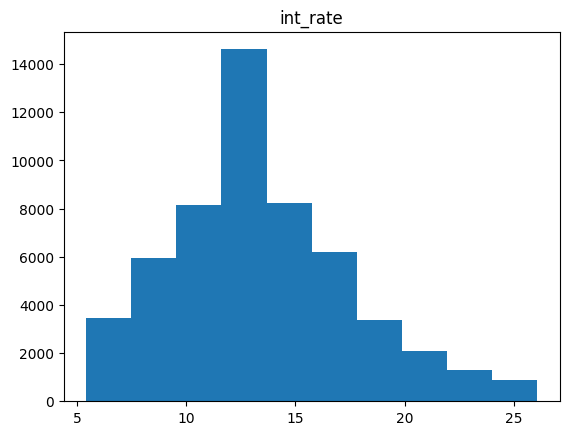

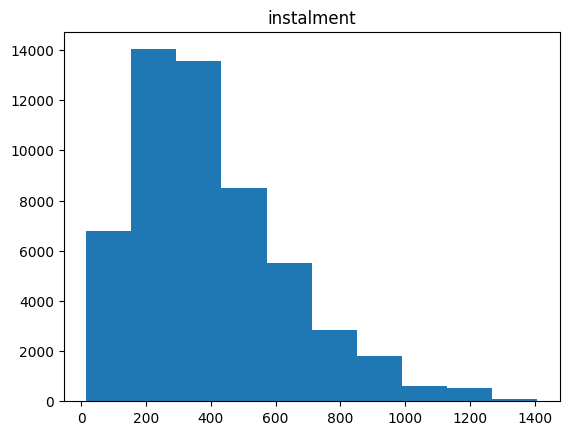

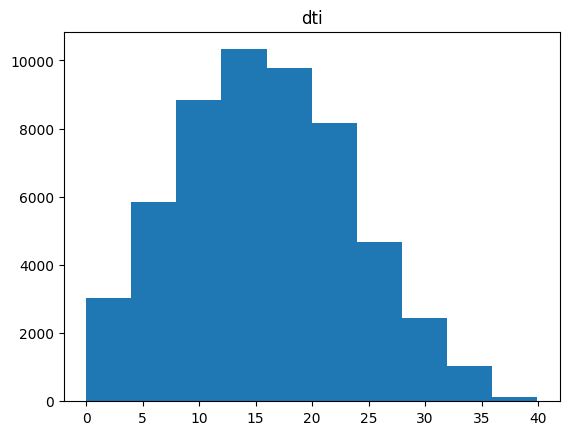

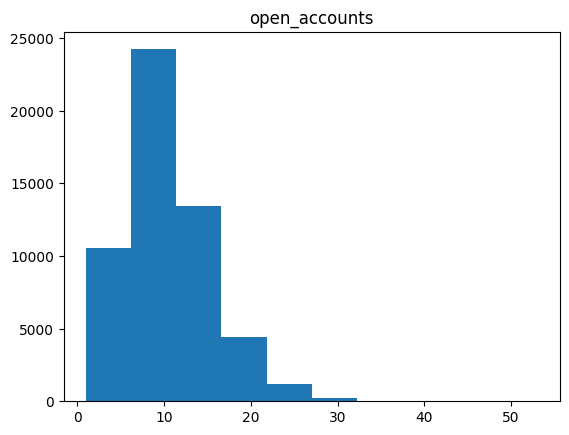

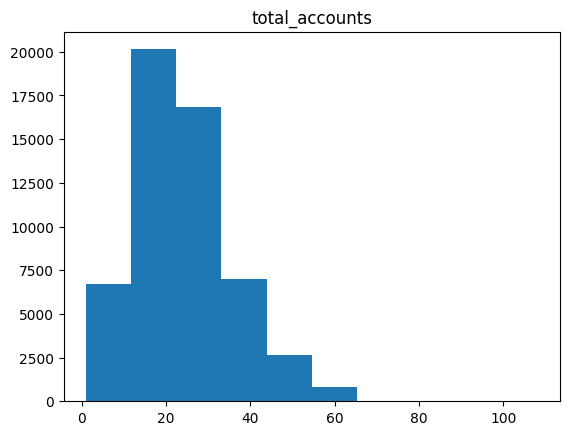

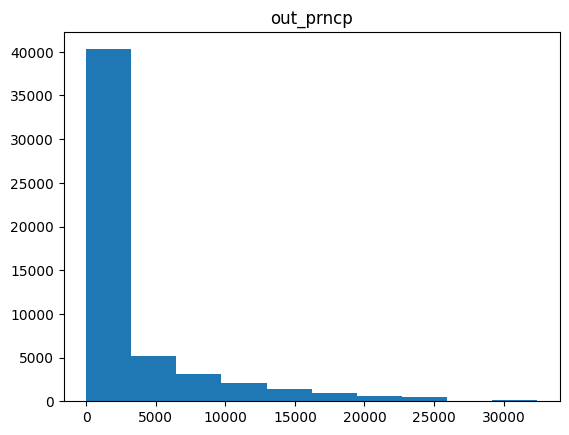

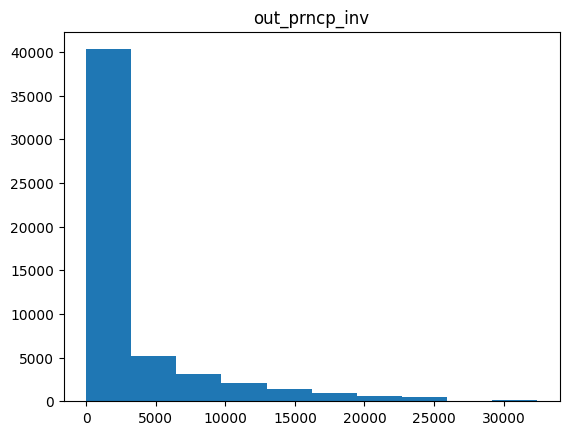

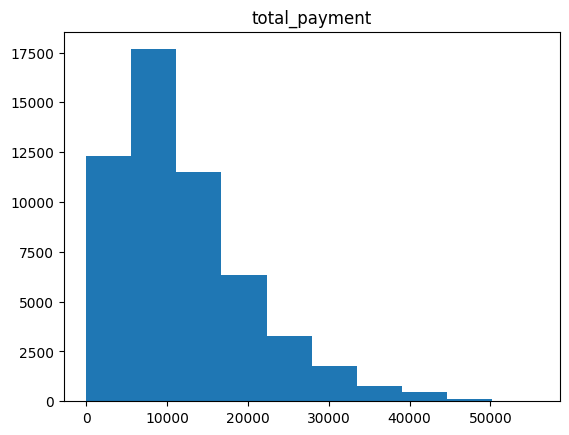

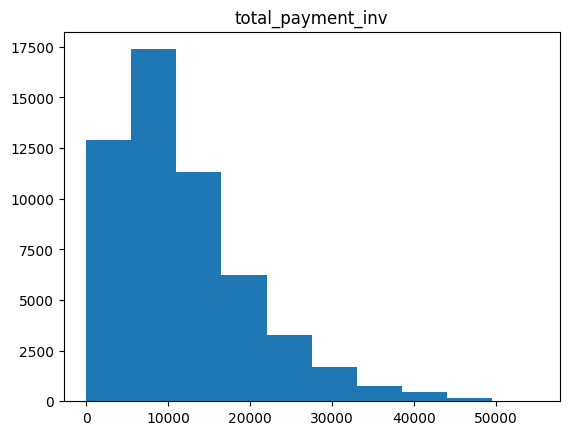

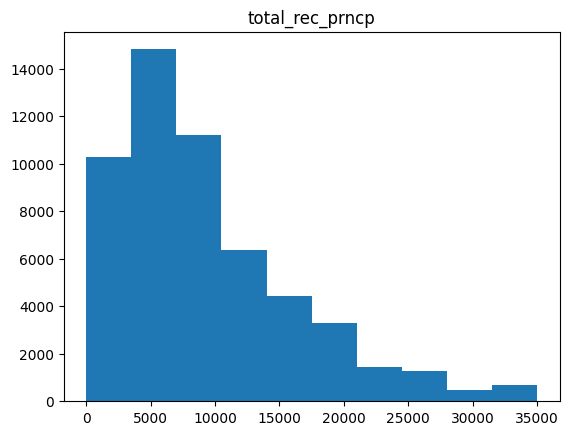

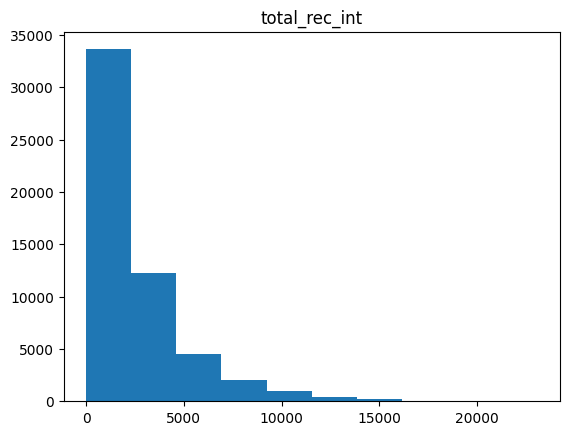

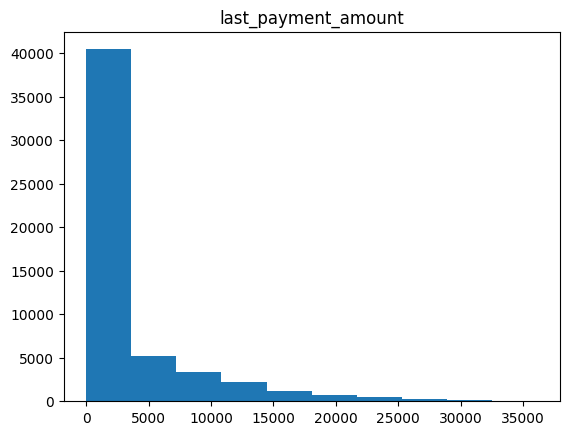

In [20]:
db_plot.skewness()

We use the *PowerTransformer()* method from *sklearn* which uses the *yeo-johnnson* correction in this case:

In [21]:
db_trans.correct_skew()
db_new_plot = db_plotter.Plotter(db_trans.newdf)

Here is a plot of the data after the corrrection:

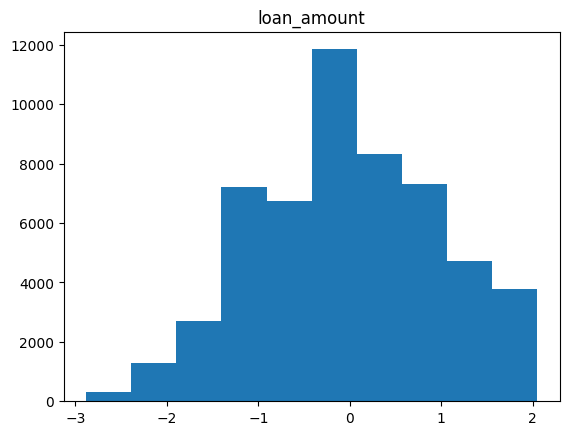

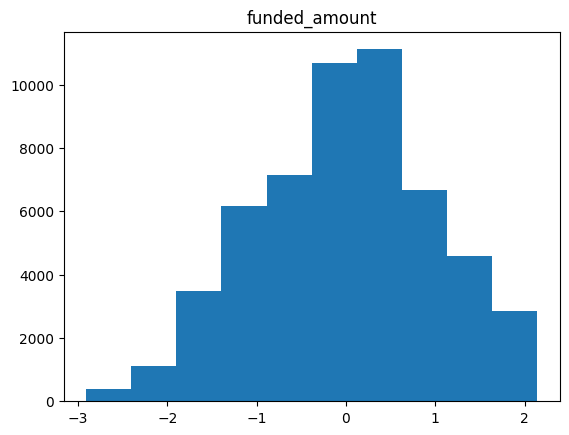

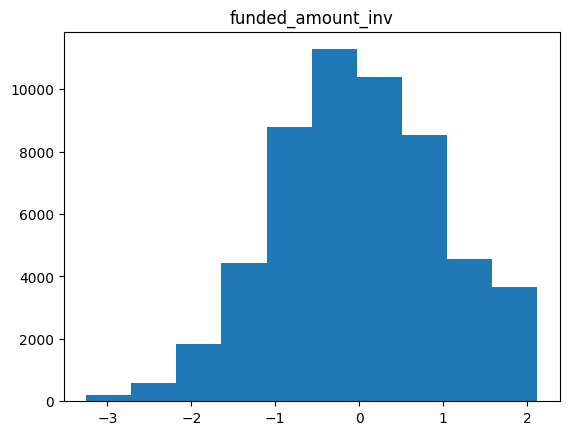

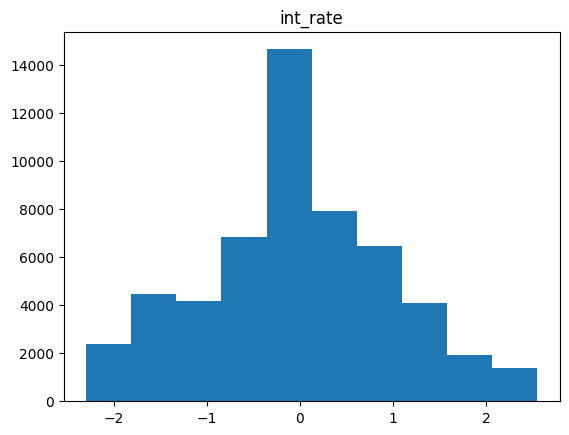

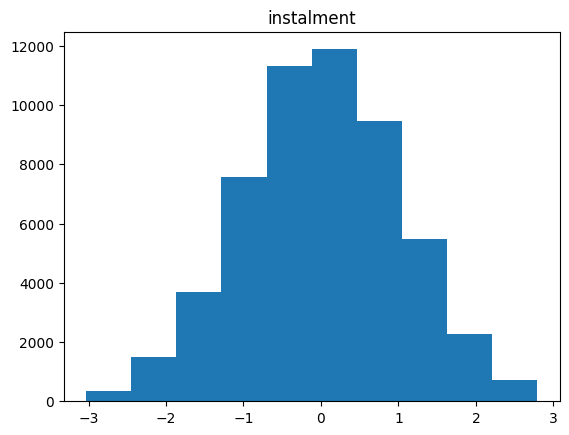

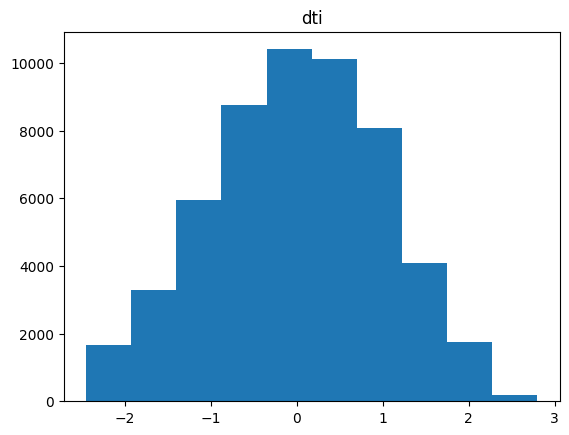

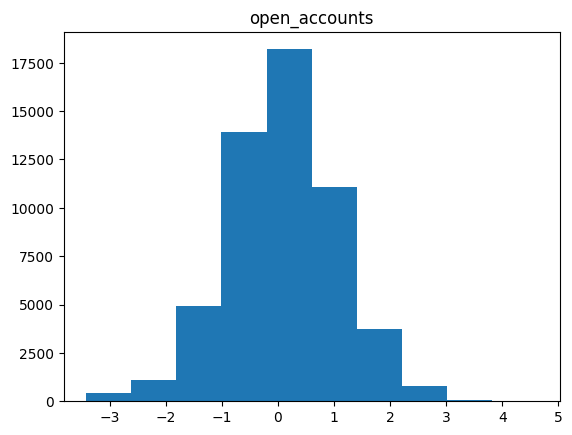

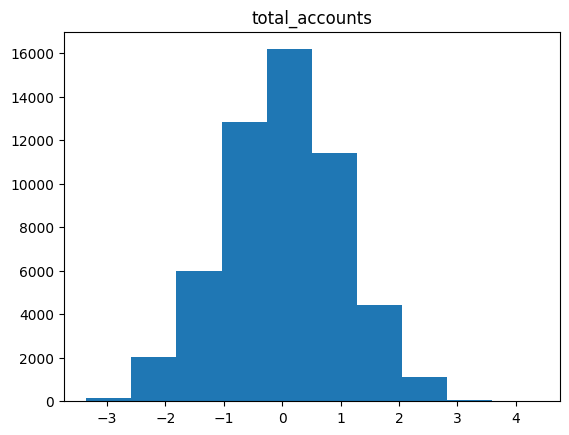

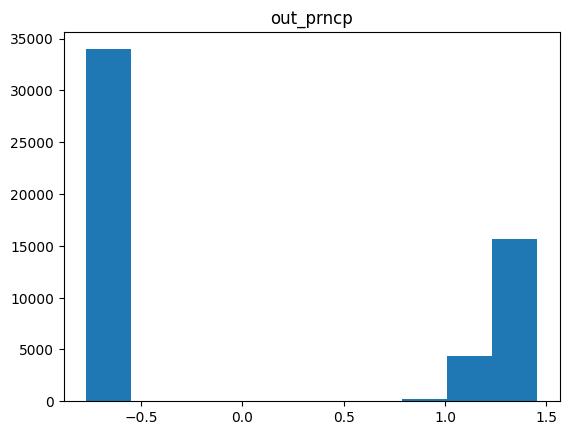

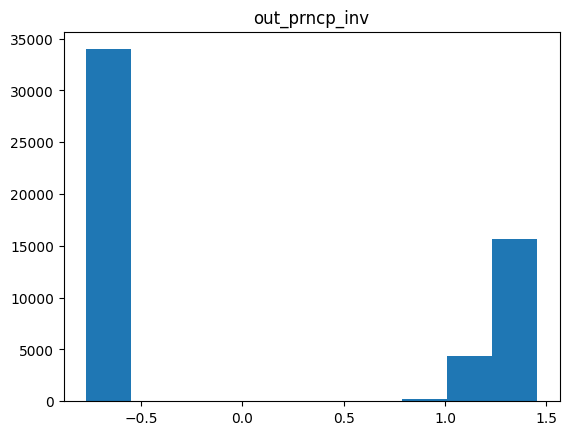

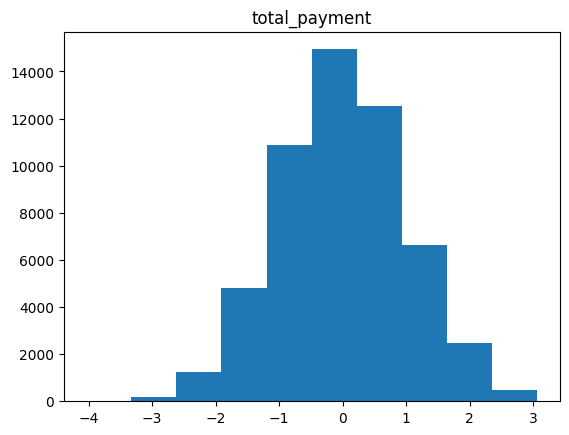

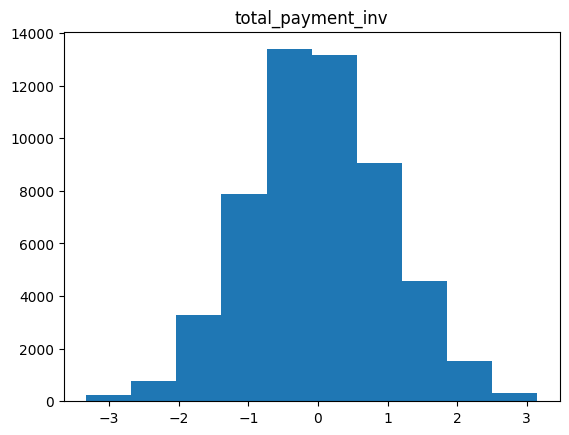

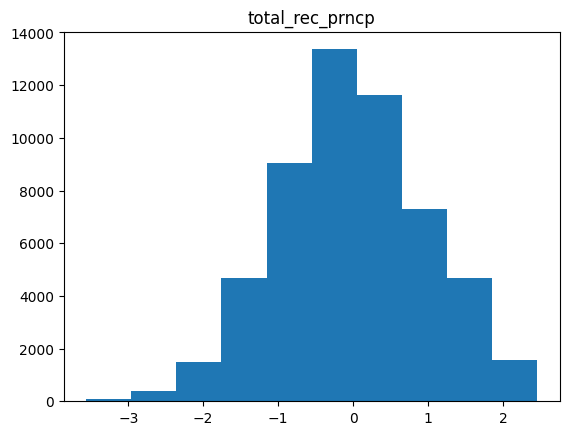

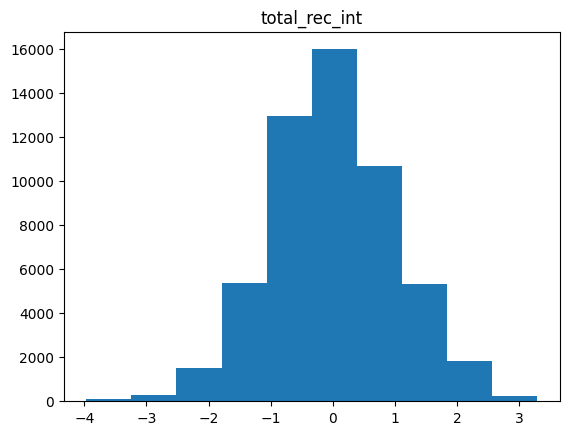

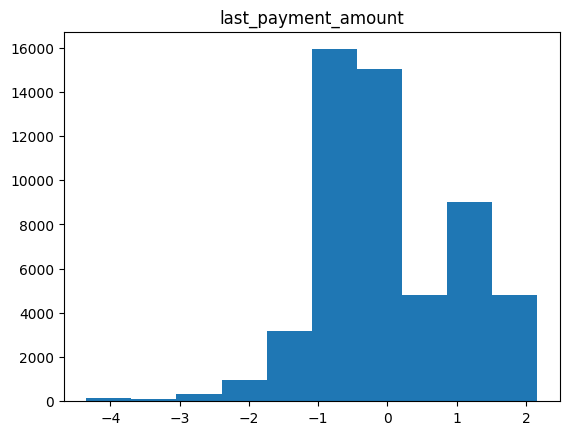

In [22]:
db_new_plot.skewness()

<h3>Correlation:<h3>

Here we have a correlation matrix of the data:

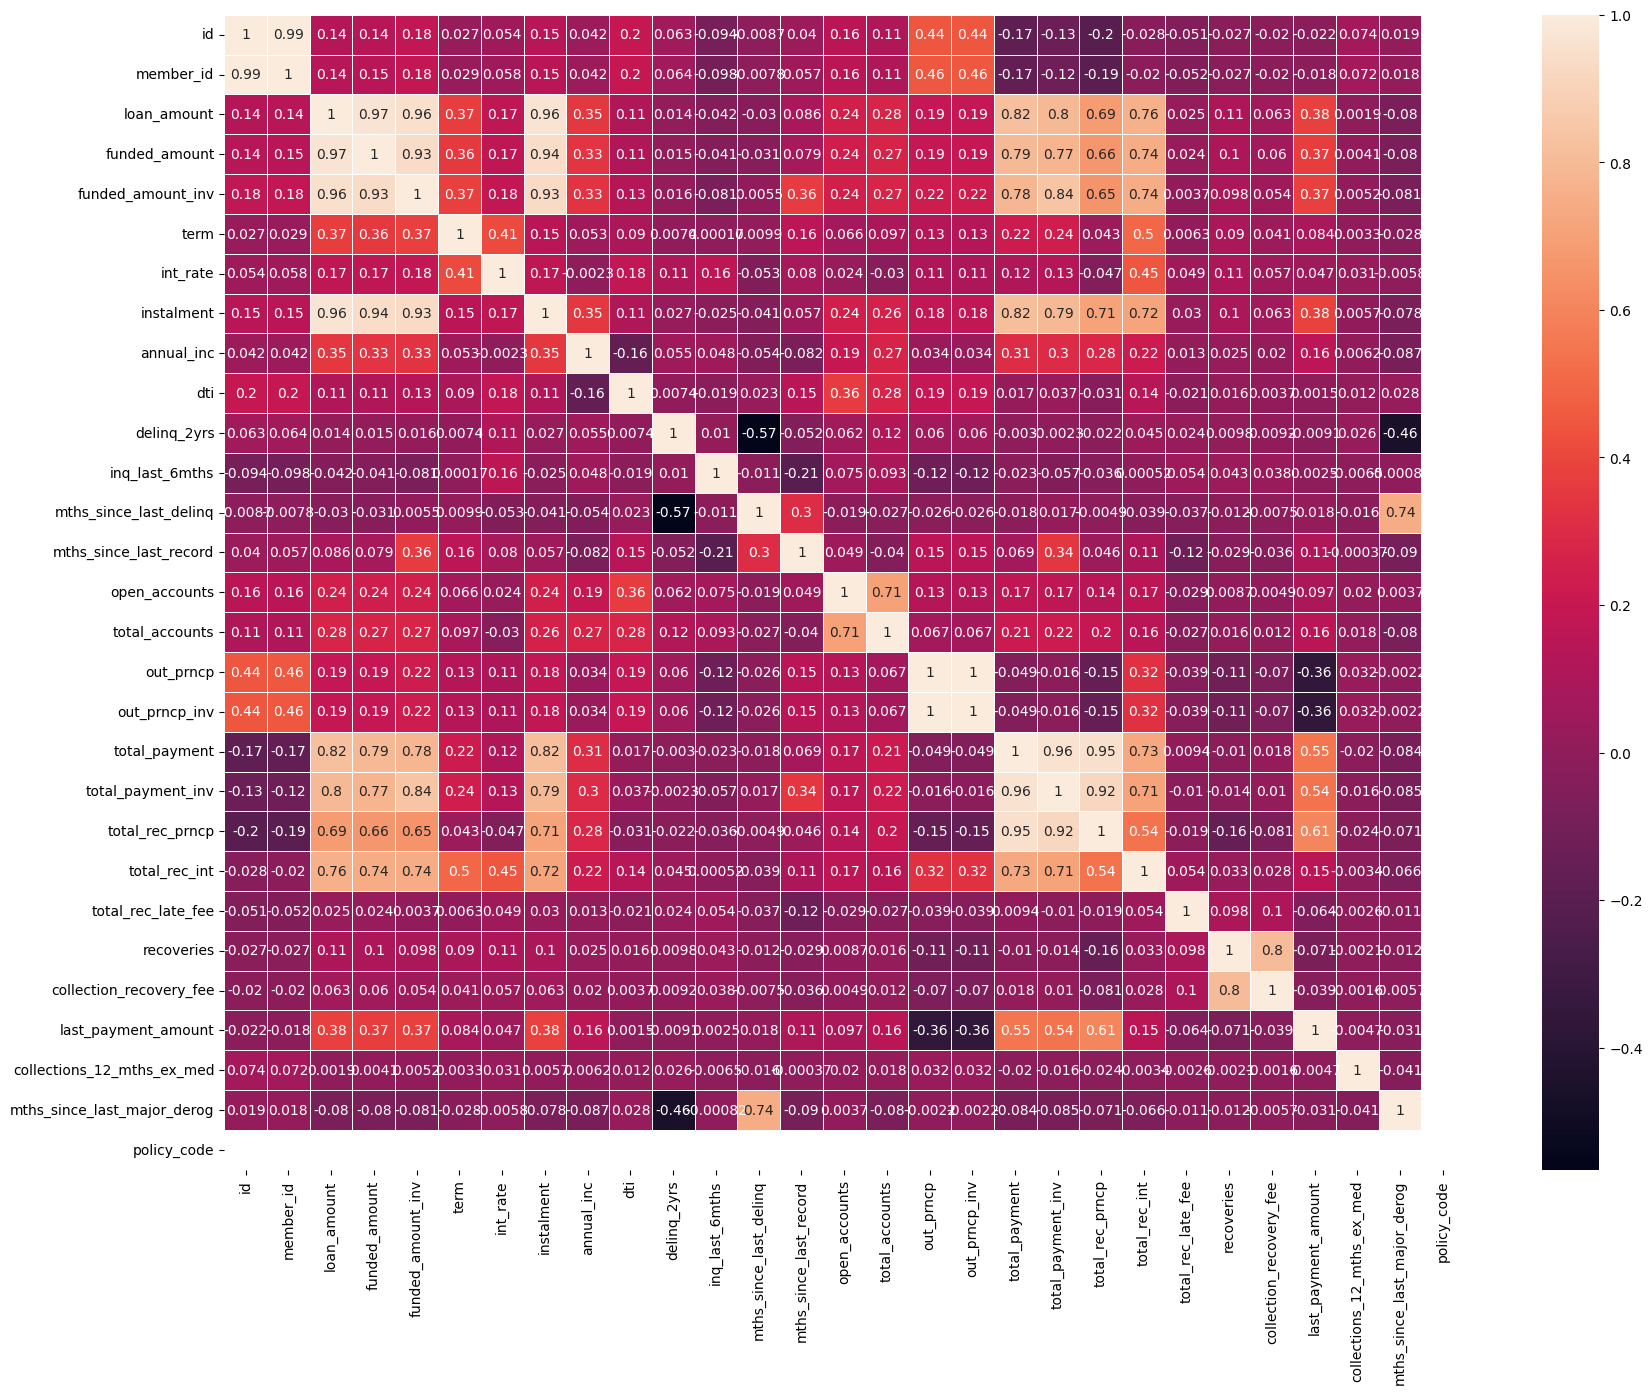

In [23]:
db_new_plot.corr_matrix()

We can see that many columns are highly positivly correlated *(over 0.9)* but no columns are highly negativly correlated.\
So we can decide on what columns to drop due to this:\
- *'member_id'* due its correlation with *'id'* 
- *'total_payment_inv'* due to its correlation with *'total_payment'* and *'total_rec_prncp'*
- *'funded_amount_inv'* due to its correlation with *'loan_amount'*, *'funded_amount'* and *'instalment'*
- *'funded_amount'* due to its correlation with *'loan_amount'*
- *'out_prncp_inv'* due to its *perfect* correlation with *'out_prncp'*
- *'instalment'* due to its correlation with *'loan_amount'*
- *'recoveries'* due to its correlation with *'collection_recovery_fee'*
- *'total_rec_prncp'* due to its correlation with *'total_payment'* and *'total_payment_inv'*

In [24]:
db_trans.correlation()

Here we have the correlation matrix after the colunms have been removed:

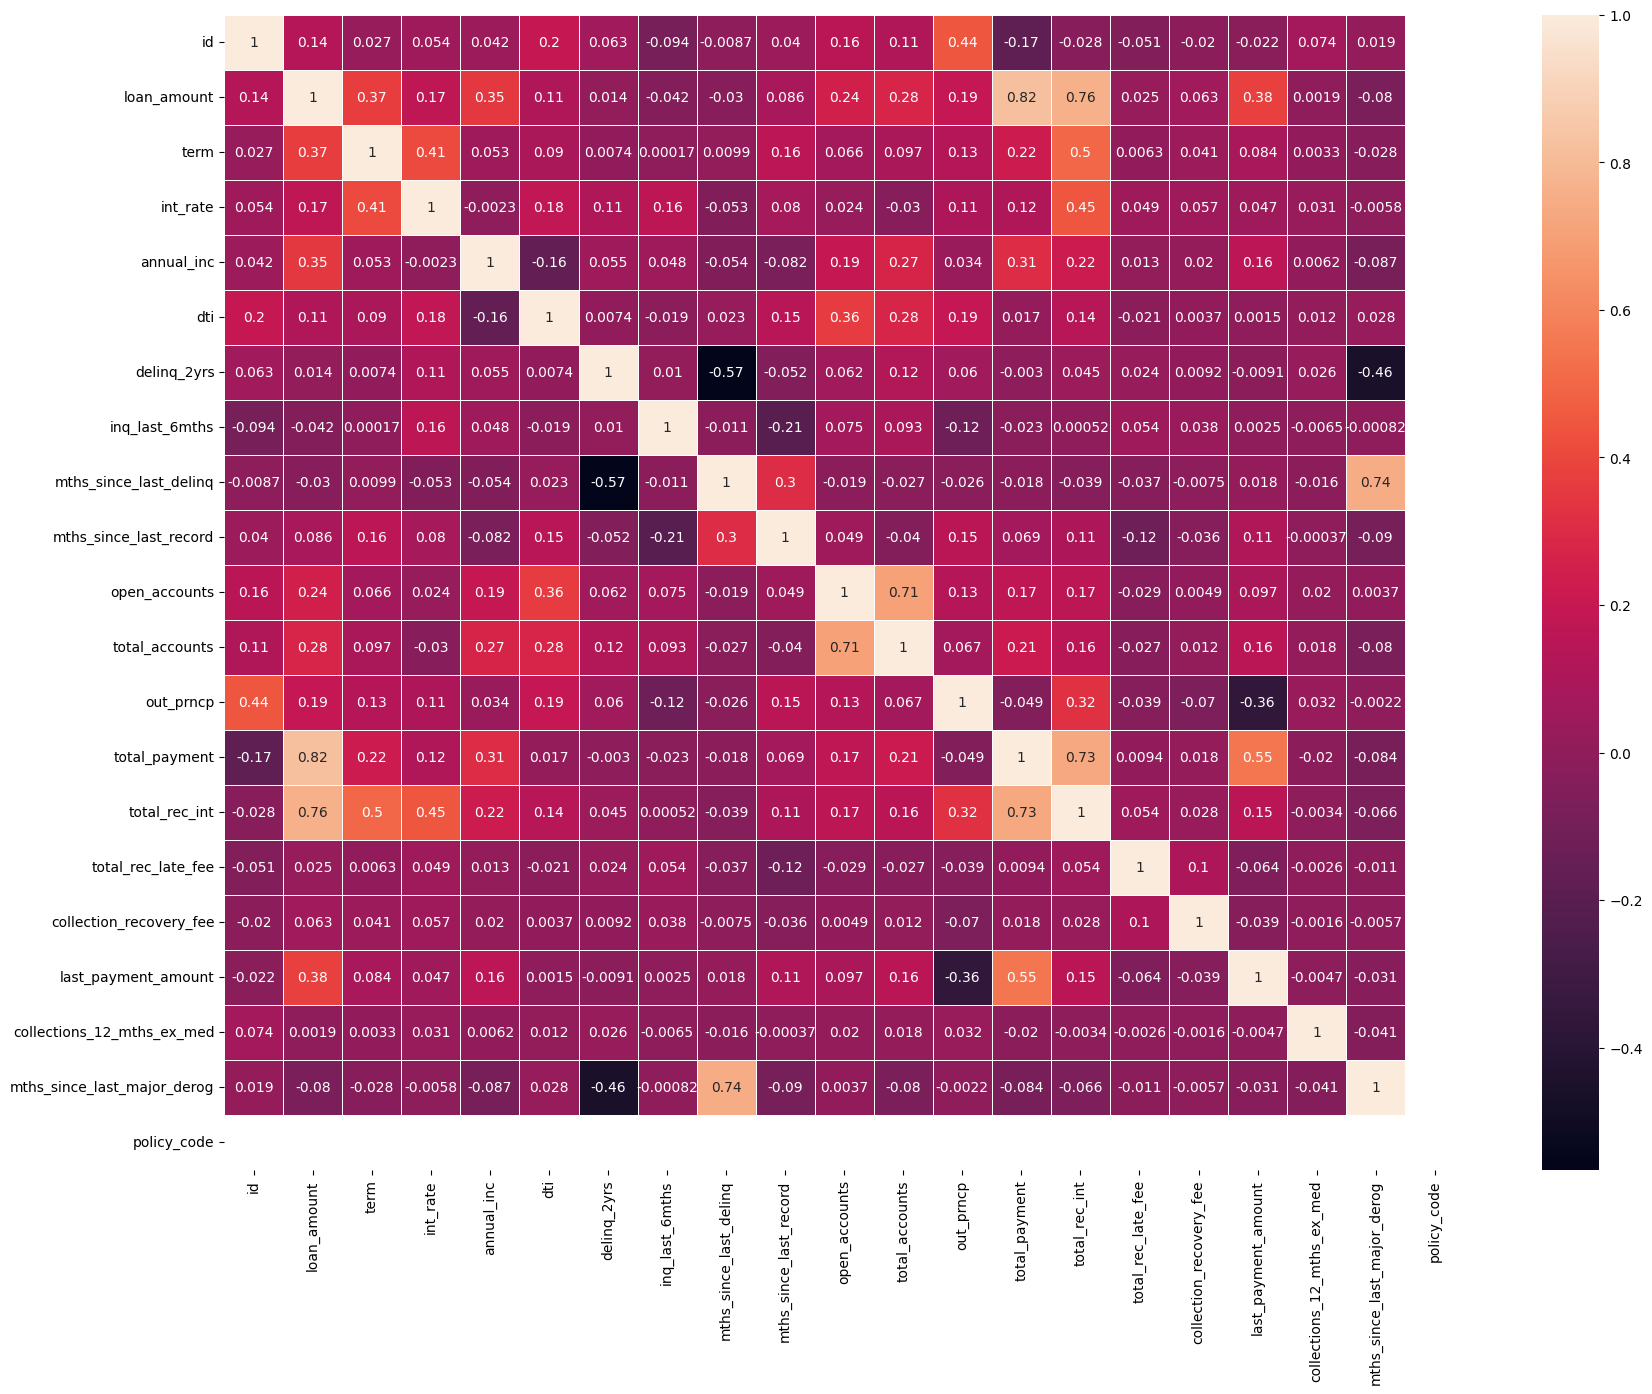

In [25]:
db_new_plot.reset_frame(db_trans.newdf)
db_new_plot.corr_matrix()

Then we have to remove any outliers, here we use the threshold of Q1 - IQR * 1.5 and Q3 + IQR * 1.5 to find said outliers:

In [26]:
db_trans.outliers()

(49266, 39)


<h2>Analysis of the Data:<h2>

In [27]:
db_ana = db_analysis.DataAnalysis(db_trans.df)

Here we have a plot of the state of the loans, we can see that 72% of the loan total has been paid back:

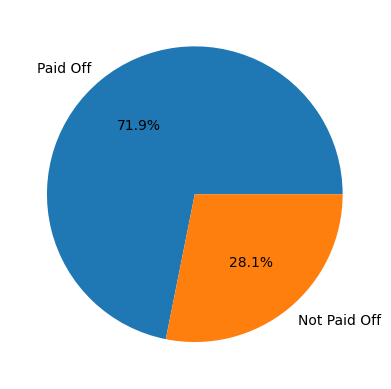

In [28]:
db_ana.state_of_loans()

Plot for the expected amount paid off in six months:

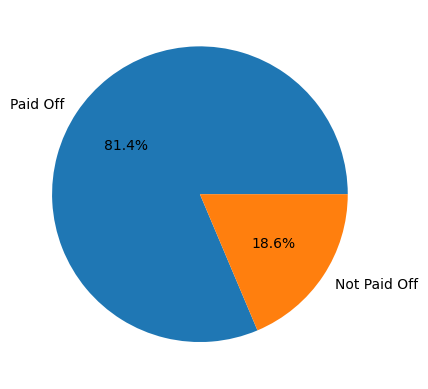

In [29]:
db_ana.six_months()

Here we have the percent of loans that are charged off, the amount paid back and the total loss from the charged off loans:

In [30]:
db_ana.loan_loss()

The percent that has been charged off is 10.77%, and the amount paid back is 17988865.66 out of 69648750.0
The amount that the company lost due to these charged off loans is, 59261219.43


Here we have the potential loss if the late loans are charged off:

In [31]:
db_ana.possible_loss()

The percentage of users that have a late payment is 1.15%, the projected loss if said customers were to not finish their payment is 3787558.36
and the percent of loss for all late loans if they were charged off, as well as all currently charged off loans is 5.41%


We then have a look at columns that would make sense to have an impact on the chance of a loan being late or charged off.\
The columns in question are *'grade_level'*, *'purpose'* and *'home_ownership'*:

In [32]:
db_ana.indicator_of_loss()

We can see that the lower the grade level of a loan the more likely it is to affect if the loan is charged off or late:
 {'A': 4.64, 'B': 9.22, 'C': 13.0, 'D': 17.68, 'E': 22.31, 'F': 27.41, 'G': 27.07}
The purpose of the loan seems to not have too big of an impact on the likelihood of the loan being a loss:
 {'credit_card': 9.58, 'debt_consolidation': 12.27, 'home_improvement': 9.78, 'small_business': 25.21, 'renewable_energy': 16.22, 'major_purchase': 10.8, 'other': 14.17, 'moving': 14.67, 'car': 9.33, 'medical': 14.02, 'house': 12.42, 'vacation': 12.5, 'wedding': 8.38, 'educational': 13.78} , execpt if the purpose is small business.
The home ownership has so imapct on the chance of the loan being charged off or late:
 {'MORTGAGE': 10.68, 'RENT': 13.11, 'OWN': 12.9, 'OTHER': 14.52, 'NONE': 0.0}
